In [170]:
# pip install windrose

Note: you may need to restart the kernel to use updated packages.


In [31]:
# get the lats and lons, id's of current meter instruments 
# export some stats for eval of currents (not all tidal related stats though)
# extracted by pyap from 'class 4' data output from analyze.py

# created by G Oldford Aug 2023

import pickle
import os
import csv

cm_p = 'D:/temp_nemo/RUN216/PROCESS/'
cm_f = 'CM_class4_SalishSea1500-RUN216_depth-below-surface.pickle'

out_p = '../data/evaluation/'
out_f = 'cm_locations.csv'

cm_class4 = pickle.load(open(os.path.join(cm_p,cm_f), 'rb'))



for meter in cm_class4.keys():
    print(meter)
    for depth in cm_class4[meter].keys():
        lon = cm_class4[meter][depth]['total']['location'][0]
        lat = cm_class4[meter][depth]['total']['location'][1]
        print(lon)
        print(lat)
        
        # Now we'll write these values to a CSV file
        with open(os.path.join(out_p, out_f), mode='a', newline='') as csv_file:
            fieldnames = ['meter', 'lat', 'lon']  # Column headings
            writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

            # Check if the file is empty and write the headers if needed
            if csv_file.tell() == 0:
                writer.writeheader()

            # Write the values for the current iteration
            writer.writerow({'meter': meter, 'lat': lat, 'lon': lon})

In [44]:
cm_class4[meter][1.600000023841858]['residual']['scores']

dict_keys(['mean_obs', 'mean_mod', 'bias', 'crmse', 'rmse', 'gamma2', 'vector_correlation', 'vector_correlation_magnitude', 'vector_correlation_radians', 'vector_correlation_degrees'])

In [69]:
cm_class4[meter][111.0]['residual']['scores']['vector_correlation']

(0.24298712839489592-0.10302862787033484j)

In [53]:
meter = 'AS04_CM_20180327-1822_20181029-1607_111m_noNaN'
cm_class4[meter].keys()

dict_keys([111.0])

In [151]:
out_p = '../data/evaluation/'
out_f = 'cm_pyap_stats.csv'

print("note this does not export all stats related to tides")

with open(os.path.join(out_p, out_f), 'w', newline='') as csvfile:
    fieldnames = ['Meter', 'Depth', 'Type', 
                  'Date Start', 'Date End',
                  'Latitude', 'Longitude',
                  'CCE', 'CCE Mag.', 'CCE Deg.', 
                  'Mean Mag. Obs. (m/s)', 'Mean Dir. Obs. (deg.)', 
                  'Mean Mag. Mod. (m/s)', 'Mean Dir. Mod. (deg.)',
                  'Simple Bias (m/s)', 'Complex Bias', 'RMSE', 'CRMSE'
                 ]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()

    for meter in cm_class4.keys():
        print(meter.split('_', 1)[0])
        for depth in cm_class4[meter].keys():
            print("depth: ", round(depth,2))
            
            # total 
            if not cm_class4[meter][depth]['total'] is None:
                date_start = cm_class4[meter][depth]['total']['obs']['time'][0].strftime('%Y-%m-%d')
                date_end = cm_class4[meter][depth]['total']['obs']['time'][-1].strftime('%Y-%m-%d')
                
                lon = cm_class4[meter][depth]['total']['location'][0]
                lat = cm_class4[meter][depth]['total']['location'][1]
                
                cce = cm_class4[meter][depth]['total']['scores']['vector_correlation']
                cce_mag = cm_class4[meter][depth]['total']['scores']['vector_correlation_magnitude']
                cce_deg = cm_class4[meter][depth]['total']['scores']['vector_correlation_degrees']

                mean_spd_tot_obs = cm_class4[meter][depth]['total']['means']['obs_sd']['full'][0]
                mean_spd_tot_mod = cm_class4[meter][depth]['total']['means']['mod_sd']['full'][0]
                mean_dir_tot_obs = cm_class4[meter][depth]['total']['means']['obs_sd']['full'][1]
                mean_dir_tot_mod = cm_class4[meter][depth]['total']['means']['mod_sd']['full'][1]
                
                bias = cm_class4[meter][depth]['total']['scores']['bias']
                rmse = cm_class4[meter][depth]['total']['scores']['rmse']
                crmse = cm_class4[meter][depth]['total']['scores']['crmse']

                print("total: ", round(cce_mag,2))
            else:
                print("error getting stats (total)")
                cce = cce_mag = cce_deg = -999.0
                mean_spd_tot_obs = mean_spd_tot_mod = mean_dir_tot_obs = mean_dir_tot_mod = -999.0
                bias = crmse = rmse = -999.0
                lon = lat = -999.0
                date_start = date_end = -999.0
                
            writer.writerow({
                    'Meter': meter.split('_', 1)[0],
                    'Depth': round(depth, 2),
                    'Type': 'Total',
                    'Date Start': date_start,
                    'Date End': date_end,
                    'Longitude': lon,
                    'Latitude': lat,
                    'CCE': round(cce, 2),
                    'CCE Mag.': round(cce_mag, 2),
                    'CCE Deg.': round(cce_deg, 2),
                    'Mean Mag. Obs. (m/s)': round(mean_spd_tot_obs,2),
                    'Mean Dir. Obs. (deg.)': round(mean_dir_tot_obs,2),
                    'Mean Mag. Mod. (m/s)': round(mean_spd_tot_mod,2),
                    'Mean Dir. Mod. (deg.)': round(mean_dir_tot_mod,2),
                    'Simple Bias (m/s)': round((mean_spd_tot_mod - mean_spd_tot_obs),2),
                    'Complex Bias': round(bias,2),
                    'RMSE': round(rmse,2),
                    'CRMSE': round(crmse,2)
                })
            
            # non tidal
            if not cm_class4[meter][depth]['residual'] is None:
                cce_nt = cm_class4[meter][depth]['residual']['scores']['vector_correlation']
                cce_mag_nt = cm_class4[meter][depth]['residual']['scores']['vector_correlation_magnitude']
                cce_deg_nt = cm_class4[meter][depth]['residual']['scores']['vector_correlation_degrees']

                mean_spd_nt_obs = cm_class4[meter][depth]['residual']['means']['obs_sd']['full'][0]
                mean_spd_nt_mod = cm_class4[meter][depth]['residual']['means']['mod_sd']['full'][0]
                mean_dir_nt_obs = cm_class4[meter][depth]['residual']['means']['obs_sd']['full'][1]
                mean_dir_nt_mod = cm_class4[meter][depth]['residual']['means']['mod_sd']['full'][1]
                
                bias_nt = cm_class4[meter][depth]['residual']['scores']['bias']
                rmse_nt = cm_class4[meter][depth]['residual']['scores']['rmse']
                crmse_nt = cm_class4[meter][depth]['residual']['scores']['crmse']

                print("non tidal: ", round(cce_mag_nt,2))
    #             print(cce_nt)
    #             print(round(cce_mag_nt,2))
    #             print(cce_deg_nt)
            else:
                print("error getting stats (residual)")
                cce_nt = cce_mag_nt = cce_deg_nt = -999.0
                mean_spd_nt_obs = mean_spd_nt_mod = mean_dir_tid_obs = mean_dir_tid_mod = -999.0
                bias_nt = rmse_nt = crmse_nt = -999.0

            writer.writerow({
                    'Meter': meter.split('_', 1)[0],
                    'Depth': round(depth, 2),
                    'Type': 'Non-Tidal',
                    'Date Start': date_start,
                    'Date End': date_end,
                    'Longitude': lon,
                    'Latitude': lat,
                    'CCE': round(cce_nt, 2),
                    'CCE Mag.': round(cce_mag_nt, 2),
                    'CCE Deg.': round(cce_deg_nt, 2),
                    'Mean Mag. Obs. (m/s)': round(mean_spd_nt_obs,2),
                    'Mean Dir. Obs. (deg.)': round(mean_dir_nt_obs,2),
                    'Mean Mag. Mod. (m/s)': round(mean_spd_nt_mod,2),
                    'Mean Dir. Mod. (deg.)': round(mean_dir_nt_mod,2),
                    'Simple Bias (m/s)': round((mean_spd_nt_mod-mean_spd_nt_obs),2),
                    'Complex Bias': round(bias_nt,2),
                    'RMSE': round(rmse_nt,2),
                    'CRMSE': round(crmse_nt,2)
                })
                
            # tidal
            if not cm_class4[meter][depth]['tidal'] is None:
                cce_t = cm_class4[meter][depth]['tidal']['scores']['vector_correlation']
                cce_mag_t = cm_class4[meter][depth]['tidal']['scores']['vector_correlation_magnitude']
                cce_deg_t = cm_class4[meter][depth]['tidal']['scores']['vector_correlation_degrees']

                # no means for tidal
#                 mean_spd_tid_obs = cm_class4[meter][depth]['tidal']['means']['obs_sd']['full'][0]
#                 mean_spd_tid_mod = cm_class4[meter][depth]['tidal']['means']['mod_sd']['full'][0]
#                 mean_dir_tid_obs = cm_class4[meter][depth]['tidal']['means']['obs_sd']['full'][1]
#                 mean_dir_tid_mod = cm_class4[meter][depth]['tidal']['means']['mod_sd']['full'][1]        

                print("tidal: ", round(cce_mag_t,2))
    #             print(cce_nt)
    #             print(round(cce_mag_nt,2))
    #             print(cce_deg_nt)
            else:
                print("error getting stats (tidal)")
                cce_t = cce_mag_t = cce_deg_t = -999.0
                mean_spd_tid_obs = mean_spd_tid_mod = mean_dir_tid_obs = mean_dir_tid_mod = -999.0

            writer.writerow({
                    'Meter': meter.split('_', 1)[0],
                    'Depth': round(depth, 2),
                    'Type': 'Tidal',
                    'Date Start': date_start,
                    'Date End': date_end,
                    'Longitude': lon,
                    'Latitude': lat,
                    'CCE': round(cce_t, 2),
                    'CCE Mag.': round(cce_mag_t, 2),
                    'CCE Deg.': round(cce_deg_t, 2),
                    'Mean Mag. Obs. (m/s)': -999.0,
                    'Mean Dir. Obs. (deg.)': -999.0,
                    'Mean Mag. Mod. (m/s)': -999.0,
                    'Mean Dir. Mod. (deg.)': -999.0,
                    'Simple Bias (m/s)': -999.0,
                    'Complex Bias': -999.0,
                    'RMSE': -999.0,
                    'CRMSE': -999.0
                })
                
            

        print("")

note this does not export all stats related to tides
AS04
depth:  111.0
total:  0.91
non tidal:  0.24
tidal:  0.96

AS04
depth:  111.0
total:  0.9
non tidal:  0.28
tidal:  0.95

AS04
depth:  111.0
total:  0.9
non tidal:  0.28
tidal:  0.95

AS04
depth:  111.0
total:  0.88
non tidal:  0.26
tidal:  0.93

AS04
depth:  111.0
total:  0.85
non tidal:  0.17
tidal:  0.9

BDYPM
depth:  220.0
total:  0.55
non tidal:  0.03
tidal:  0.69

BDYPM
depth:  220.0
total:  0.35
non tidal:  0.13
tidal:  0.49

BDYPM
depth:  220.0
total:  0.31
non tidal:  0.08
tidal:  0.44

BDYPM
depth:  220.0
total:  0.48
error getting stats (residual)
error getting stats (tidal)

BDYPM
depth:  220.0
total:  0.6
non tidal:  0.02
tidal:  0.73

BDYPM
depth:  220.0
total:  0.58
non tidal:  0.01
tidal:  0.72

JF2C
depth:  182.0
total:  0.72
non tidal:  0.13
tidal:  0.82

JF2C
depth:  182.0
total:  0.86
non tidal:  0.22
tidal:  0.91

JF2C
depth:  182.0
total:  0.94
non tidal:  0.2
tidal:  0.98

MAC
depth:  55.0
total:  0.74
non t

C:\Users\Greig\AppData\Local\Temp\ipykernel_13608\2355812966.py:62: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  'CCE': round(cce, 2),
C:\Users\Greig\AppData\Local\Temp\ipykernel_13608\2355812966.py:70: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  'Complex Bias': round(bias,2),
C:\Users\Greig\AppData\Local\Temp\ipykernel_13608\2355812966.py:108: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  'CCE': round(cce_nt, 2),
C:\Users\Greig\AppData\Local\Temp\ipykernel_13608\2355812966.py:116: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a 

In [143]:
# scraps below

In [169]:
meter = 'AS04_CM_20160101-0037_20160415-1552_111m_noNaN'
depth = 111.0
cm_class4[meter][depth]['total']['obs'].keys()

dict_keys(['time', 'u', 'v', 'speed', 'dirn'])

In [139]:
cm_class4[meter][depth]['total']['obs']['time'][0].strftime('%Y-%m-%d')
# cm_class4[meter][depth]['total']['obs']['time'][-1]

'2018-09-16'

In [140]:
meter.split('_', 1)[0]

'NDBC46088'

In [145]:
cm_class4[meter][depth]['total']['scores'].keys()

dict_keys(['mean_obs', 'mean_mod', 'bias', 'crmse', 'rmse', 'gamma2', 'vector_correlation', 'vector_correlation_magnitude', 'vector_correlation_radians', 'vector_correlation_degrees'])

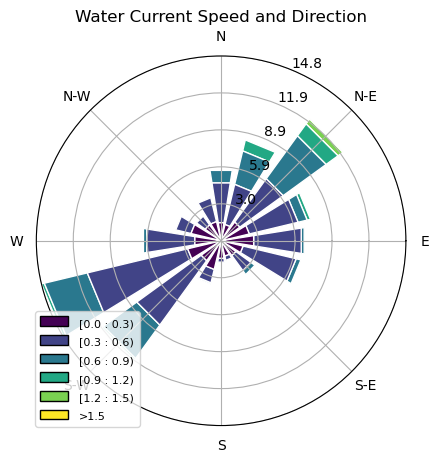

In [185]:
import matplotlib.pyplot as plt
from windrose import WindroseAxes
import numpy as np

obs_data = cm_class4[meter][depth]['total']['obs']
speeds = obs_data['speed']
directions = obs_data['dirn']

# Create a wind rose plot
fig, ax = plt.subplots(subplot_kw={'projection': 'windrose'})



# Convert directions to radians
directions_rad = np.radians(directions)

# Plot the wind rose
# ax = WindroseAxes.from_ax()
ax.bar(directions, speeds, normed=True, opening=0.8, edgecolor='white')



# ax.set_xticklabels(['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'])
ax.set_legend()

plt.title('Water Current Speed and Direction')
plt.show()

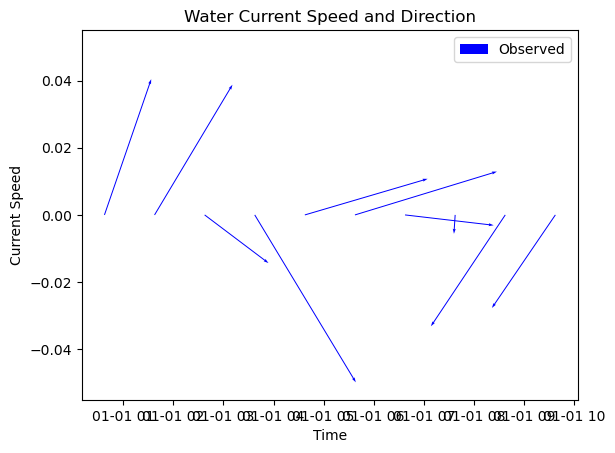

In [253]:

obs_data = cm_class4[meter][depth]['total']['obs']
mod_data = cm_class4[meter][depth]['total']['mod']

trunc = 10 

obs_speeds = obs_data['speed'][0:trunc]
obs_u = obs_data['u'][0:trunc]
obs_v = obs_data['v'][0:trunc]
obs_directions = obs_data['dirn'][0:trunc]

mod_speeds = mod_data['speed'][0:trunc]
mod_directions = mod_data['dirn'][0:trunc]
mod_u = mod_data['u'][0:trunc]
mod_v = mod_data['v'][0:trunc]

# obs_directions_rad = np.radians(obs_directions)
# mod_directions_rad = np.radians(mod_directions)

min_y = min(np.min(obs_v), np.min(mod_v))
max_y = max(np.max(obs_v), np.max(mod_v))


# Create a quiver plot
fig, ax = plt.subplots()

# Plot 'obs' data as quiver
ax.quiver(
    obs_data['time'][0:trunc],          # x-coordinates
    np.zeros_like(obs_speeds), # y-coordinates (set to zero for overlay)
    obs_u, # u (speed in x-direction)
    obs_v, # v (speed in y-direction)
    angles='xy', color='blue', label='Observed', scale=1,
    width=0.002
)

# Overlay 'mod' data as quiver
# ax.quiver(
#     mod_data['time'][0:trunc],          # x-coordinates
#     np.zeros_like(mod_speeds), # y-coordinates (set to zero for overlay)
#     mod_u, # u (speed in x-direction)
#     mod_v, # v (speed in y-direction)
#     angles='xy', color='red', label='Modeled', alpha=0.7, width=0.002, scale=1
# )

ax.set_xlabel('Time')
ax.set_ylabel('Current Speed')
# ax.set_ylim(min_y*10, max_y*10)  # Set y-axis limits
ax.legend()
ax.set_title('Water Current Speed and Direction')
plt.show()

In [240]:
max_y

0.867

In [252]:
obs_v

array([ 0.2085,  0.157 , -0.042 , -0.201 ,  0.027 ,  0.0325, -0.0075,
       -0.0375, -0.1275, -0.1055])